# Flight Passenger Satisfaction Analysis

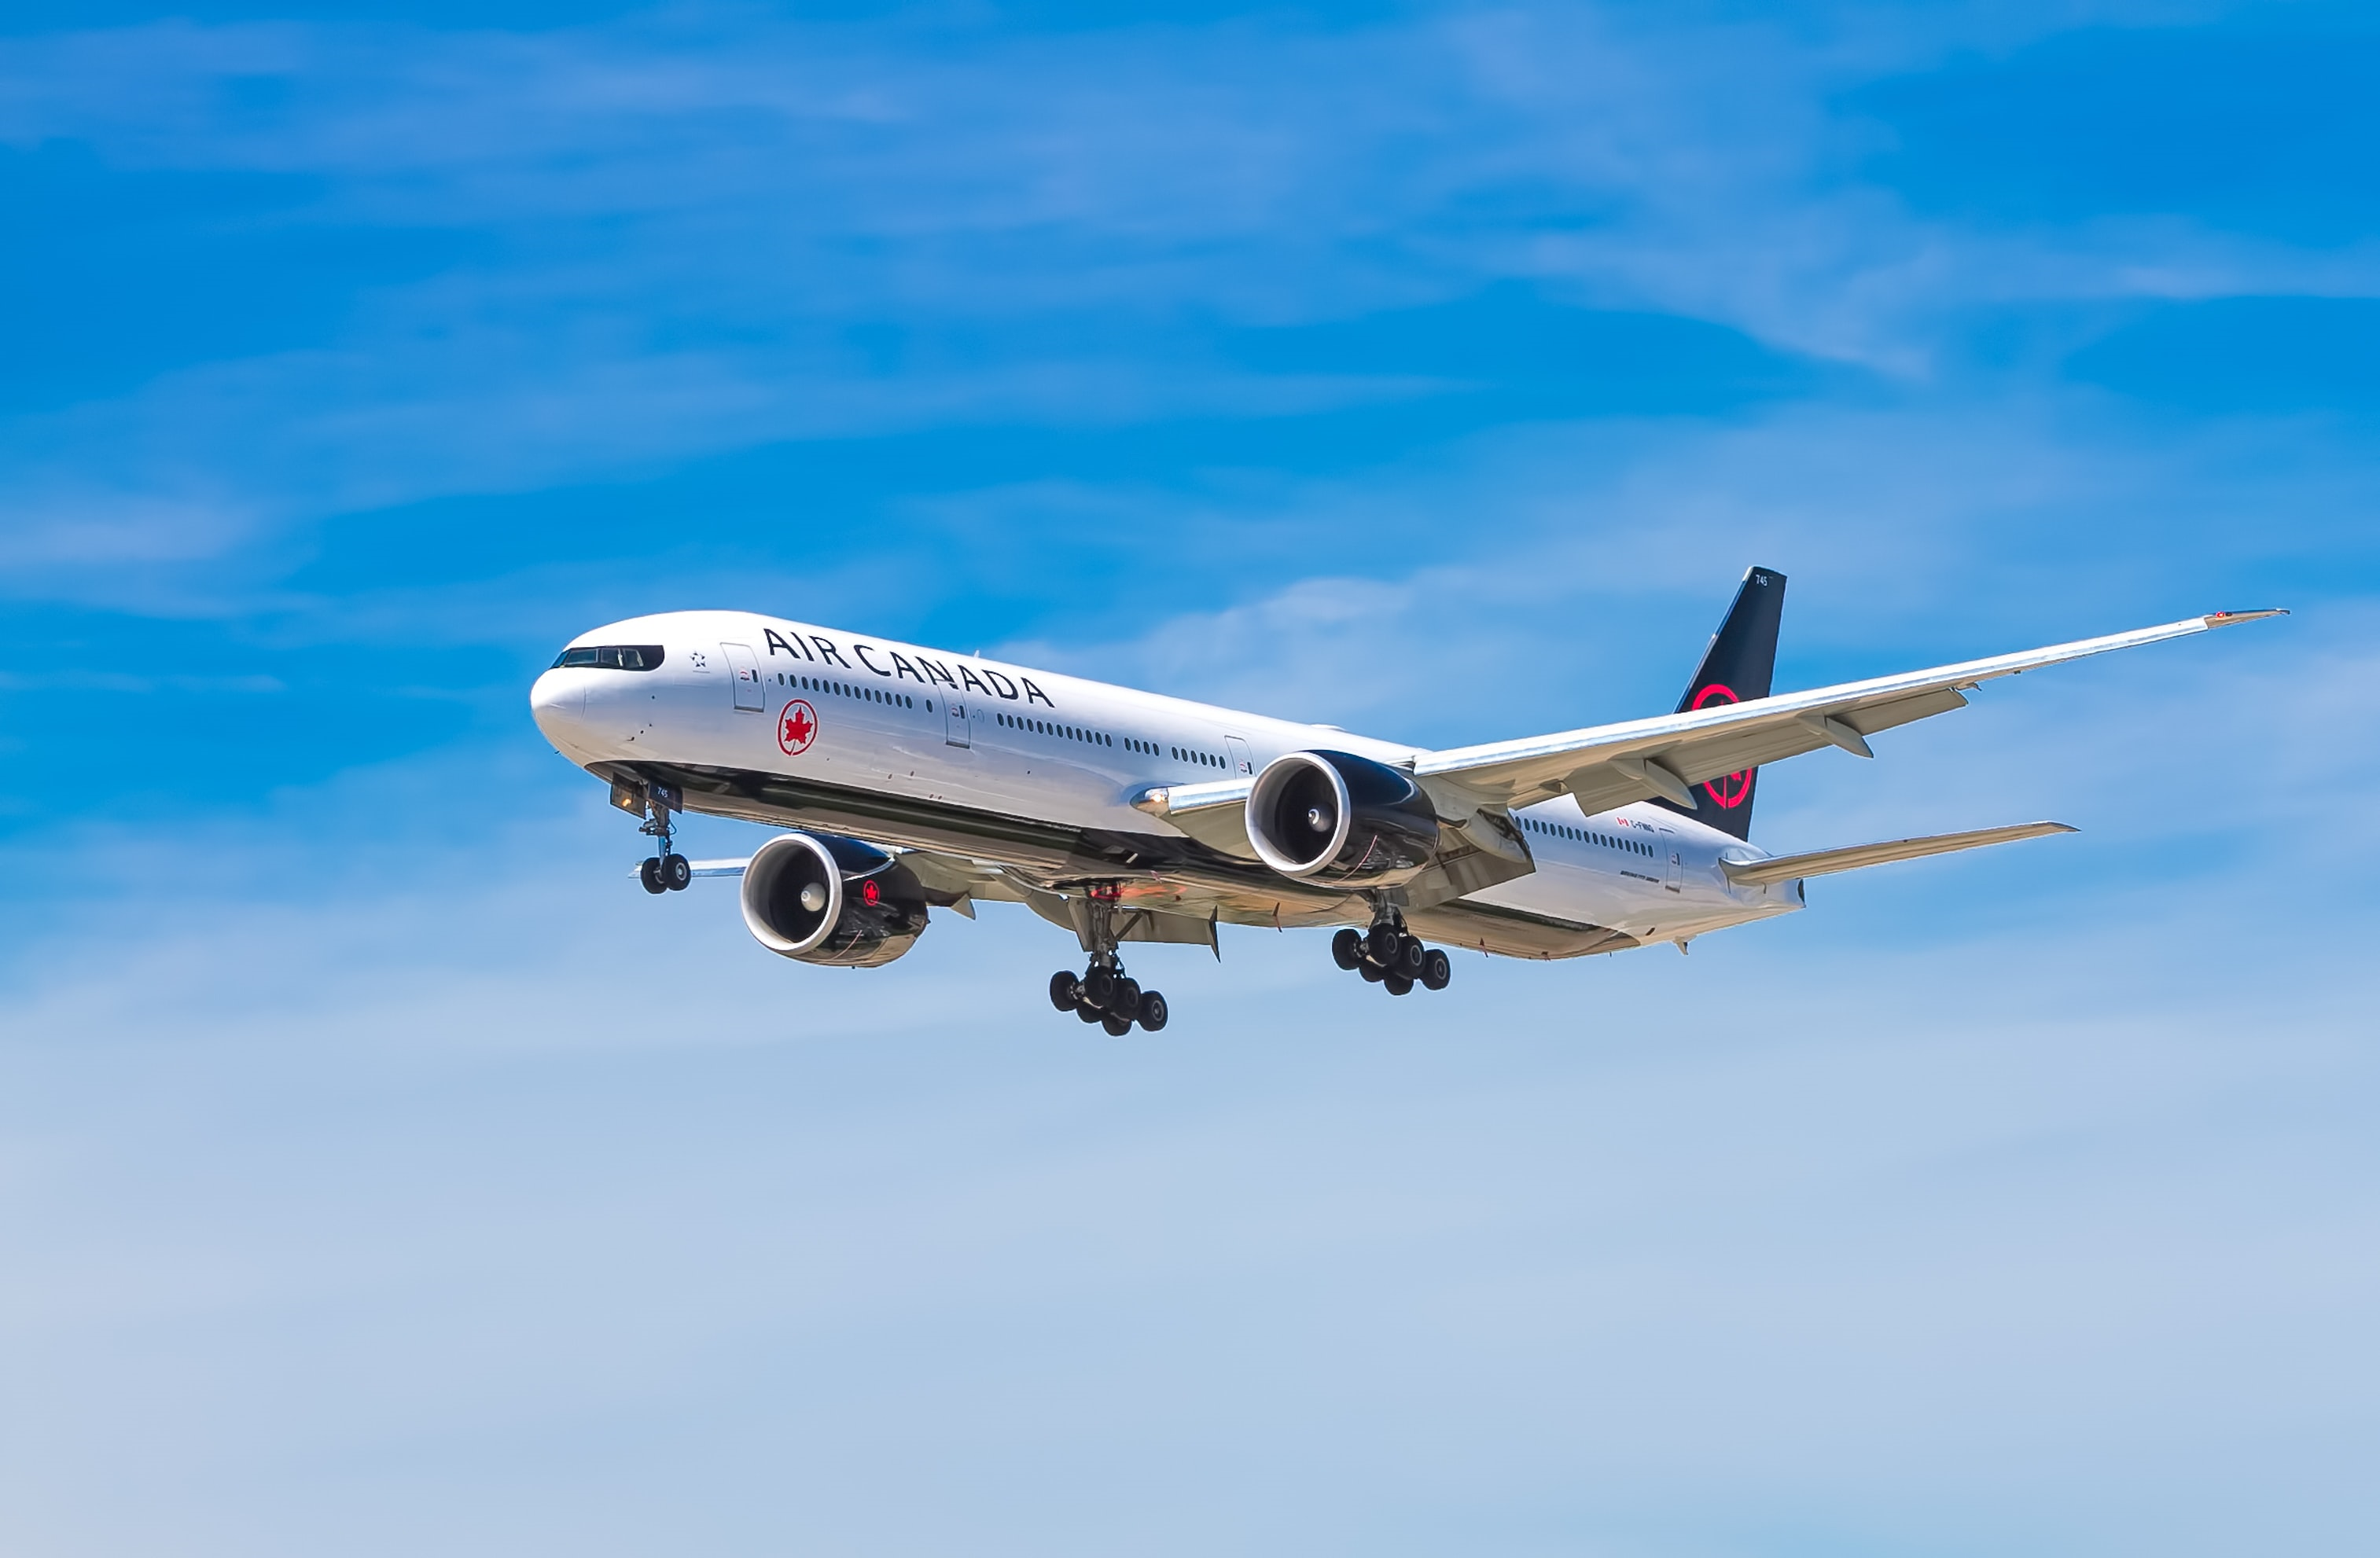

# Introduction
<br>
* We will guess whether the passengers are satisfied with the trip <br>
* We will try to use this data to create a model which tries predict if passenger is satisfied or not <br>
* We will use various machine learning algorithms in our model. <br>

In [1]:
#Loading All Necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

# Load Data

In [2]:
train_df = pd.read_csv("F:/Final Project/train.csv")
test_df = pd.read_csv("F:/Final Project/test.csv")

In [3]:
print(train_df.shape,test_df.shape)

(103904, 25) (25976, 25)


In [4]:
train_df.drop(labels=["Unnamed: 0"],axis=1,inplace=True)
test_df.drop(labels=["Unnamed: 0"],axis=1,inplace=True)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

![](http://)* int64(18): id, Age,Flight Distance, Inflight wifi service, Departure/Arrival time convenient, Ease of Online booking, Gate location, Food and drink, Online boarding, Seat comfort, Inflight entertainment, On-board service, Leg room service, Baggage handling, Checkin service, Inflight service, Cleanliness and Departure Delay in Minutes.
* object(5): Gender, Customer Type, Type of Travel, Class and satisfaction.
* float64(1): Arrival Delay in Minutes.

<a id = "2"></a><br>
# Variable Description
1. id : Unique id number to each passenger.
2. Gender: Gender of the passengers (Female, Male)
3. Customer Type: The customer type (Loyal customer, disloyal customer)
4. Age: The actual age of the passengers
5. Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)
6. Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
7. Flight distance: The flight distance of this journey
8. Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
9. Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient
10. Ease of Online booking: Satisfaction level of online booking
11. Gate location: Satisfaction level of Gate location
12. Food and drink: Satisfaction level of Food and drink
13. Online boarding: Satisfaction level of online boarding
14. Seat comfort: Satisfaction level of Seat comfort
15. Inflight entertainment: Satisfaction level of inflight entertainment
16. On-board service: Satisfaction level of On-board service
17. Leg room service: Satisfaction level of Leg room service
18. Baggage handling: Satisfaction level of baggage handling
19. Check-in service: Satisfaction level of Check-in service
20. Inflight service: Satisfaction level of inflight service
21. Cleanliness: Satisfaction level of Cleanliness
22. Departure Delay in Minutes: Minutes delayed when departure
23. Arrival Delay in Minutes: Minutes delayed when Arrival
24. Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [6]:
final_df= pd.concat([train_df,test_df],axis=0).reset_index(drop=True)

#  **DATA MINING**

**Missing Value**
* Find Missing Value
* Fill Missing Value

In [7]:
final_df.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

## Fill Missing Value
* Arrival_Delay_in_Minutes has 393 missing value
* Since I do not know the flight delay time, I will try a different method.
* I will fill the nan values with the average flight delay time. Because I don't want my model to be affected by this parameter.


In [8]:
final_df['Arrival Delay in Minutes'] = final_df['Arrival Delay in Minutes'].fillna(final_df['Arrival Delay in Minutes'].mean())

# Basic Data Analysis

**Now let's look at the effect of some features on satisfaction
* Gender --> satisfaction
* Age --> satisfaction
* Type_of_Travel --> satisfaction
* Class --> satisfaction
* Customer_Type --> satisfaction
* Cleanliness --> satisfaction
* Inflight_wifi_service --> satisfaction
* Inflight_entertainment --> satisfaction
* Food_and_drink --> satisfaction
* Seat_comfort --> satisfaction

In [9]:
final_df.satisfaction.replace({'satisfied':1, 'neutral or dissatisfied':0}, inplace=True)

In [10]:
# Gender vs satisfaction
final_df[["Gender","satisfaction"]].groupby(["Gender"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)


Gender  satisfaction
1    Male      0.440115
0  Female      0.428975

* Satisfaction rate of male passengers %44, satification rate of female passenger %43

In [11]:
# Age vs satisfaction
final_df[["Age","satisfaction"]].groupby(["Age"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

Age  satisfaction
34   41      0.609259
44   51      0.603600
39   46      0.602671
46   53      0.588978
45   52      0.587149
..  ...           ...
62   69      0.140175
3    10      0.135036
63   70      0.127937
1     8      0.101631
0     7      0.094891

[75 rows x 2 columns]

* The most satisfied age group 46-56.

In [12]:
# Type_of_Travel vs satisfaction
final_df[["Type of Travel","satisfaction"]].groupby(["Type of Travel"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

Type of Travel  satisfaction
0  Business travel      0.583724
1  Personal Travel      0.101326

* 58% of passengers traveling on business are satisfied, 0.09% of passengers traveling on personal are satisfied. It's interesting statitic.

In [13]:
# Class vs satisfaction
final_df[["Class","satisfaction"]].groupby(["Class"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

Class  satisfaction
0  Business      0.694434
2  Eco Plus      0.246414
1       Eco      0.187673

* %69 of passenger class on business are satisfied, %24 of passenger class on eco plus are satisfied, %19 of passenger class on eco are satisfied. It is interesting that there is such a difference in satisfaction between eco and business.

In [14]:
# Customer_Type vs satisfaction
final_df[["Customer Type","satisfaction"]].groupby(["Customer Type"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

Customer Type  satisfaction
0     Loyal Customer      0.478115
1  disloyal Customer      0.239697

* Loyal Customer most satisfied than disloyal customer.

In [15]:
# Cleanliness vs satisfaction
final_df[["Cleanliness","satisfaction"]].groupby(["Cleanliness"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

Cleanliness  satisfaction
5            5      0.612472
4            4      0.535282
3            3      0.433075
2            2      0.212649
1            1      0.196963
0            0      0.000000

* Most of those who give 5 points to cleanliness are satisfied with the flight.

In [16]:
# Inflight_wifi_service vs satisfaction
final_df[["Inflight wifi service","satisfaction"]].groupby(["Inflight wifi service"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

Inflight wifi service  satisfaction
0                      0      0.997446
5                      5      0.990178
4                      4      0.600767
1                      1      0.328198
3                      3      0.251825
2                      2      0.247215

* Most of those who give 0 to wifi service on the plane are satisfied with the flight. It seems that wifi service is not that important.

In [17]:
# Inflight_entertainment vs satisfaction
final_df[["Inflight entertainment","satisfaction"]].groupby(["Inflight entertainment"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

Inflight entertainment  satisfaction
5                       5      0.650615
4                       4      0.611128
3                       3      0.273154
2                       2      0.212673
1                       1      0.141946
0                       0      0.000000

* There is a standard distribution in flight entertainment.

In [18]:
# Food_and_drink vs satisfaction
final_df[["Food and drink","satisfaction"]].groupby(["Food and drink"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

Food and drink  satisfaction
5               5      0.550882
4               4      0.525832
0               0      0.416667
3               3      0.397424
2               2      0.389000
1               1      0.199551

* 20% of the passengers who do not like the food are satisfied with the flight.Interesting statitic.

In [19]:
# Seat_comfort vs satisfaction
final_df[["Seat comfort","satisfaction"]].groupby(["Seat comfort"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

Seat comfort  satisfaction
5             5      0.651336
4             4      0.560293
2             2      0.226024
1             1      0.223325
3             3      0.214078
0             0      0.000000

* There is no one that gives the seat comfort 0 points.

# **DATA CLEANSING**

* Variable Transformation <br>
* Convert categorical variables by replace function so that they can be used by the models.<br>

In [20]:
final_df.select_dtypes(include='object')

Gender      Customer Type   Type of Travel     Class
0         Male     Loyal Customer  Personal Travel  Eco Plus
1         Male  disloyal Customer  Business travel  Business
2       Female     Loyal Customer  Business travel  Business
3       Female     Loyal Customer  Business travel  Business
4         Male     Loyal Customer  Business travel  Business
...        ...                ...              ...       ...
129875    Male  disloyal Customer  Business travel  Business
129876    Male     Loyal Customer  Business travel  Business
129877  Female     Loyal Customer  Personal Travel       Eco
129878    Male     Loyal Customer  Business travel  Business
129879  Female     Loyal Customer  Personal Travel       Eco

[129880 rows x 4 columns]

In [21]:
category2=["Gender", "Customer Type", "Type of Travel", "Class"]
for c in category2:
    print("{} \n".format(final_df[c].value_counts()))


Female    65899
Male      63981
Name: Gender, dtype: int64 

Loyal Customer       106100
disloyal Customer     23780
Name: Customer Type, dtype: int64 

Business travel    89693
Personal Travel    40187
Name: Type of Travel, dtype: int64 

Business    62160
Eco         58309
Eco Plus     9411
Name: Class, dtype: int64 



In [22]:
final_df.Gender.replace({'Female':1, 'Male':0}, inplace=True)
final_df['Customer Type'].replace({'Loyal Customer':1, 'disloyal Customer':0}, inplace=True)
final_df['Type of Travel'].replace({'Business travel':1, 'Personal Travel':0}, inplace=True)
final_df['Class'].replace({'Eco Plus':0, 'Eco':1,'Business':2}, inplace=True)

## Exploratory Data Analysis

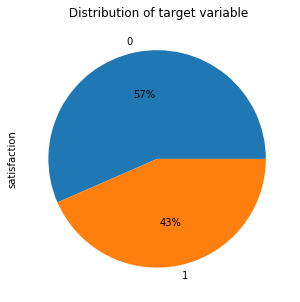

In [23]:
plt.figure(figsize=(5,5))
plt.title(' Distribution of target variable')
final_df['satisfaction'].value_counts().plot(kind = 'pie',autopct = '%1.0f%%')
plt.savefig('Distributionoftargetvariable.png')
plt.show()

## Gender-->Satisfaction

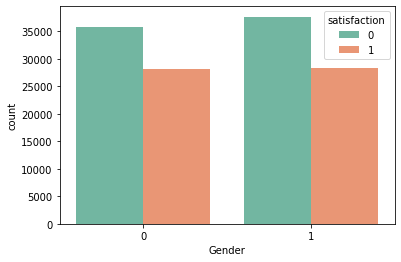

In [24]:
sns.countplot(x= 'Gender', hue='satisfaction',data = final_df, palette= "Set2")

* Females and males are satisfaction probability almost equal. Male %44, Female %43 satisfaction.


## Age-->Satisfaction

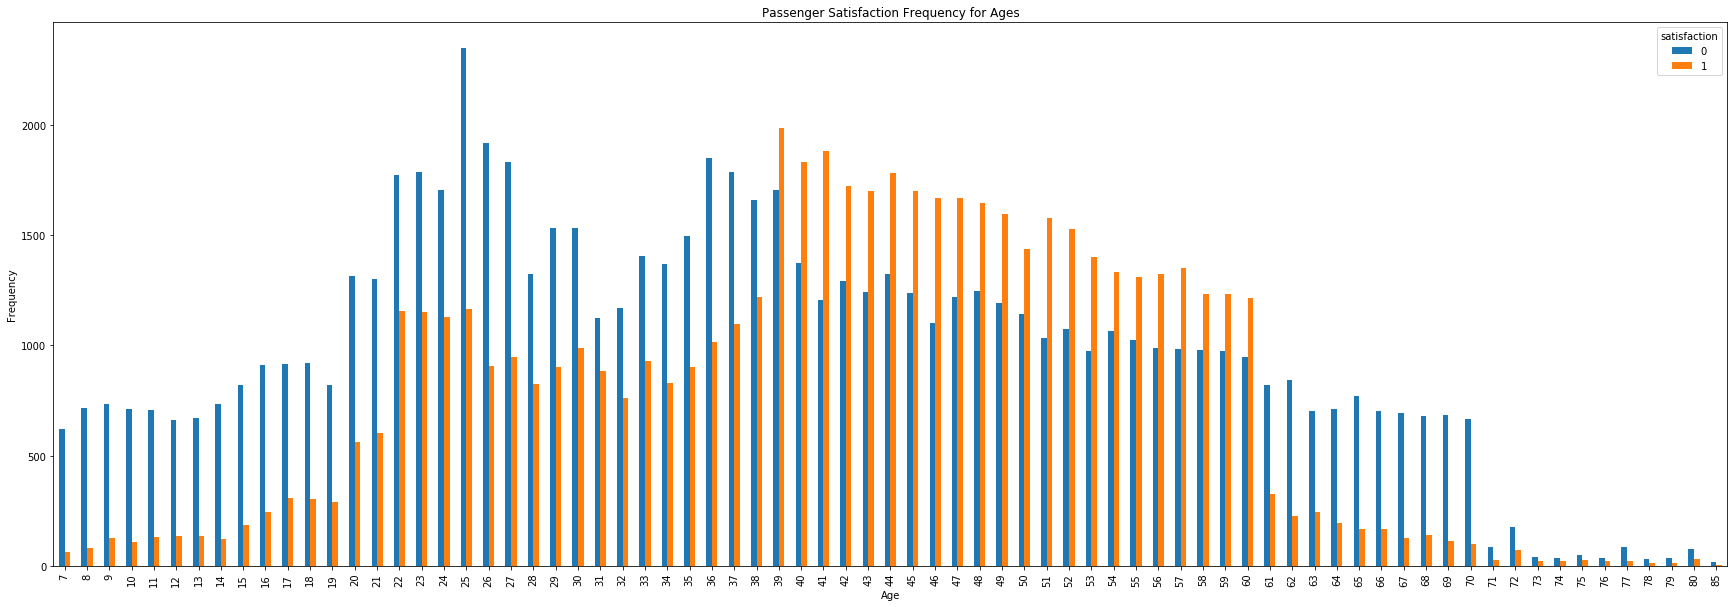

In [25]:
pd.crosstab(final_df.Age,final_df.satisfaction).plot(kind="bar",figsize=(30,10))
plt.title('Passenger Satisfaction Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('passengersatisfactionAndAges.png')
plt.show()

intervals = (0,10,20,35,60,85)
categories = ['Baby','Child','Teen','Adult','Old']
#colors=('lightgreen','lightred')

titanic['age_seg'] = pd.cut(titanic.age, intervals,labels =categories)

sns.countplot(x='age_seg',data=titanic, hue='survived' ,palette = 'Set2

* 0-30 years old is  generally neutral or dissatisfied with the flight.
* 30-60 years old is generally satisfied with the flight.
* 65-85 years old passengers is neutral or dissatisfied.

## Class-->Satisfaction

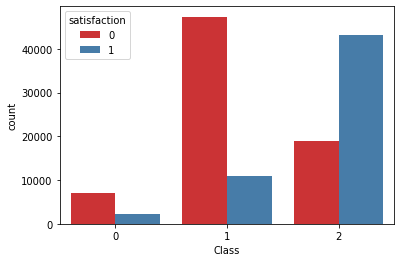

In [26]:
sns.countplot(x= 'Class', hue='satisfaction',data = final_df, palette= "Set1")

* Business class is also happy here. But eco and eco plus  neutral or dissatisfied with the flight. 

## Customer Type-->Satisfaction

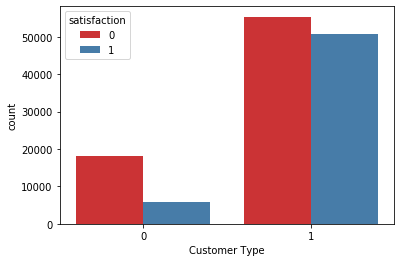

In [27]:
sns.countplot(x= 'Customer Type', hue='satisfaction',data = final_df, palette= "Set1")

* Disloyal customer is generally neutral or dissatisfied with the flight.

## Type of Travel-->Satisfaction

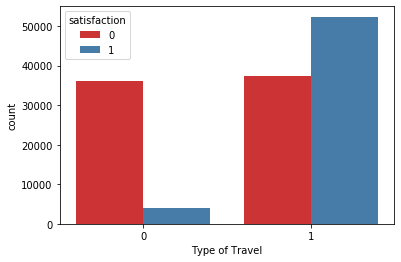

In [28]:
sns.countplot(x= 'Type of Travel', hue='satisfaction',data = final_df, palette= "Set1")

* Business travel is generally satisfied with the flight but personal travel is generally neutral or dissatisfied with the flight.
* Personal travel is %90 neutral or dissatisfied with the flight. This statistic is interesting.

# Personal Travel Analysis
* Personal travel is generally neutral or dissatisfied with the flight.
* Let's examine why.

In [29]:
personal=final_df[final_df['Type of Travel']==0] 
personal.head()

id  Gender  Customer Type  Age  Type of Travel  Class  \
0    70172       0              1   13               0      0   
5   111157       1              1   26               0      1   
6    82113       0              1   47               0      1   
11   51412       1              1   12               0      0   
13   83502       0              1   33               0      1   

    Flight Distance  Inflight wifi service  Departure/Arrival time convenient  \
0               460                      3                                  4   
5              1180                      3                                  4   
6              1276                      2                                  4   
11              308                      2                                  4   
13              946                      4                                  2   

    Ease of Online booking  ...  Inflight entertainment  On-board service  \
0                        3  ...                       5                 4   
5                        2  ...                       1                 3   
6                        2  ...                       2                 3   
11                       2  ...                       1                 1   
13                       4  ...                       4                 4   

    Leg room service  Baggage handling  Checkin service  Inflight service  \
0                  3                 4                4                 5   
5                  4                 4                4                 4   
6                  3                 4                3                 5   
11                 2                 5                5                 5   
13                 5                 2                2                 2   

    Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  \
0             5                          25                      18.0   
5             1                           0                       0.0   
6             2                           9                      23.0   
11            1                           0                       0.0   
13            4                           0                       0.0   

    satisfaction  
0              0  
5              0  
6              0  
11             0  
13             1  

[5 rows x 24 columns]

## Eating, Drinking, Cleaning and In-flight Entertainment Scoring of Personal Travel Passenger

In [30]:
def eat_plot(variable):
    
    var=personal[variable]
    var_Value=var.value_counts()
    
    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(var_Value.index,var_Value.values)
    
    plt.xlabel("Passengers Score")
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,var_Value))

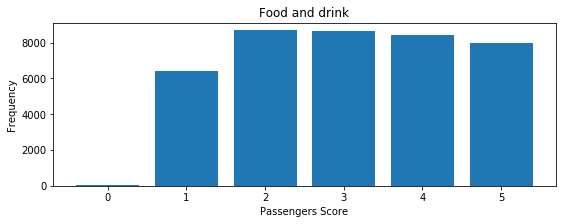

Food and drink: 
 2    8673
3    8668
4    8394
5    7992
1    6396
0      64
Name: Food and drink, dtype: int64


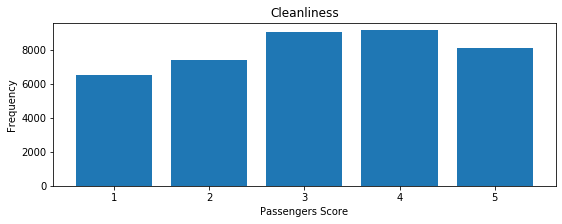

Cleanliness: 
 4    9127
3    9013
5    8095
2    7420
1    6532
Name: Cleanliness, dtype: int64


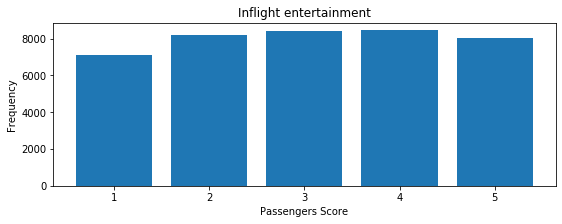

Inflight entertainment: 
 4    8437
3    8395
2    8198
5    8054
1    7103
Name: Inflight entertainment, dtype: int64


In [31]:
eat=["Food and drink", "Cleanliness", "Inflight entertainment"]

for c in eat:
    eat_plot(c)

* There are many passengers who give 1 and 2 points in eating and drinking.There are also 64 passengers giving 0 points.
* There are many passengers who give 1 and 2 points in cleaning.
* There are many passengers who get 1 and 2 points in in-flight entertainment.
* There may be a problem with these services.

## Aircraft Specifications Scoring

In [32]:
def flight_plot(variable):
    
    var=personal[variable]
    var_Value=var.value_counts()
    
    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(var_Value.index,var_Value.values)
    
    plt.xlabel("Passengers Score")
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,var_Value))

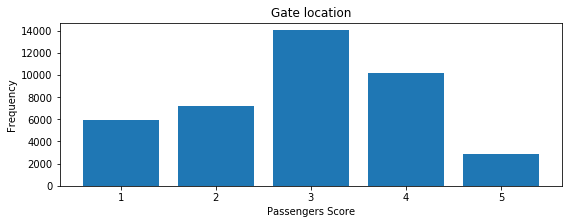

Gate location: 
 3    14010
4    10131
2     7217
1     5948
5     2881
Name: Gate location, dtype: int64


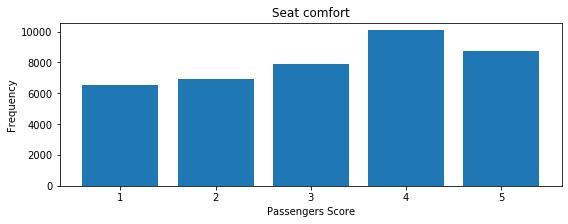

Seat comfort: 
 4    10071
5     8771
3     7876
2     6946
1     6523
Name: Seat comfort, dtype: int64


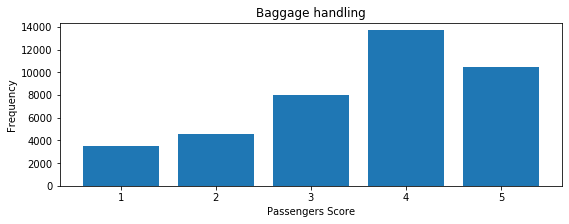

Baggage handling: 
 4    13681
5    10464
3     7988
2     4563
1     3491
Name: Baggage handling, dtype: int64


In [33]:
flight=["Gate location", "Seat comfort", "Baggage handling"]

for c in flight:
    flight_plot(c)

* The gate position of the plane is not liked.
* Seat comfort is also not liked.

In [34]:
def service_plot(variable):
    
    var=personal[variable]
    var_Value=var.value_counts()
    
    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(var_Value.index,var_Value.values)
    
    plt.xlabel("Passengers Score")
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,var_Value))

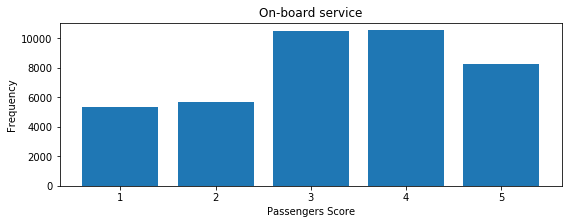

On-board service: 
 4    10511
3    10462
5     8260
2     5649
1     5305
Name: On-board service, dtype: int64


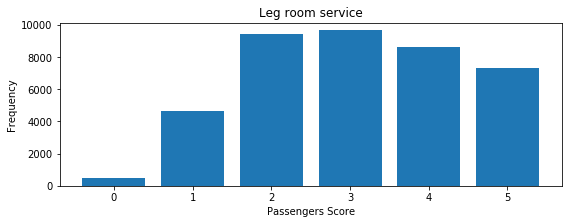

Leg room service: 
 3    9656
2    9436
4    8655
5    7309
1    4624
0     507
Name: Leg room service, dtype: int64


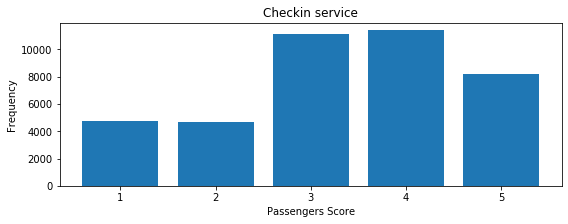

Checkin service: 
 4    11395
3    11111
5     8199
1     4768
2     4714
Name: Checkin service, dtype: int64


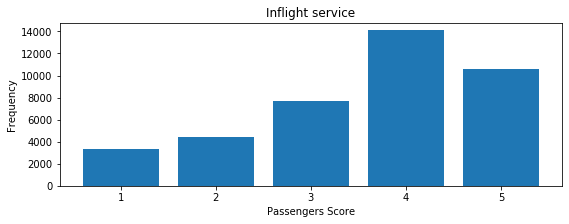

Inflight service: 
 4    14082
5    10598
3     7726
2     4429
1     3352
Name: Inflight service, dtype: int64


In [35]:
service=["On-board service", "Leg room service", "Checkin service","Inflight service"]

for c in service:
    service_plot(c)

* There are 507 0 points in the leg room service.4624 has 1 point, 9436 has 2 points. Personal travel passengers are not satisfied with this service.
* There are lots of 1 and 2 points in on board service and checking service.

## Categorical Variables

In [36]:
def bar_plot(variable):
    
    var=final_df[variable]
    var_Value=var.value_counts()
    
    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(var_Value.index,var_Value.values)
    
    plt.xlabel("Passengers Score")
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,var_Value))

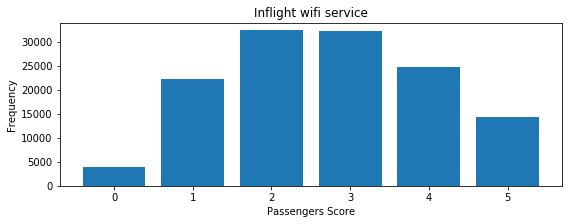

Inflight wifi service: 
 2    32320
3    32185
4    24775
1    22328
5    14356
0     3916
Name: Inflight wifi service, dtype: int64


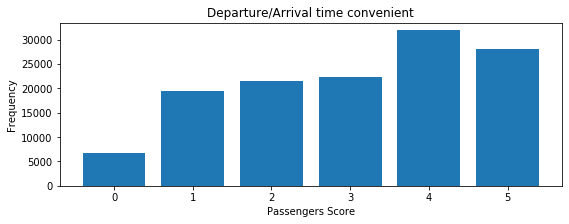

Departure/Arrival time convenient: 
 4    31880
5    27998
3    22378
2    21534
1    19409
0     6681
Name: Departure/Arrival time convenient, dtype: int64


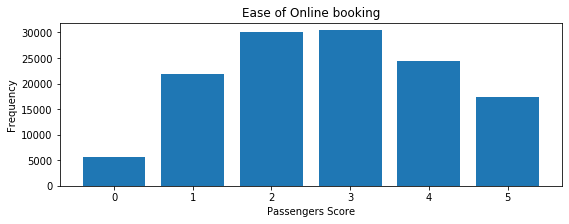

Ease of Online booking: 
 3    30393
2    30051
4    24444
1    21886
5    17424
0     5682
Name: Ease of Online booking, dtype: int64


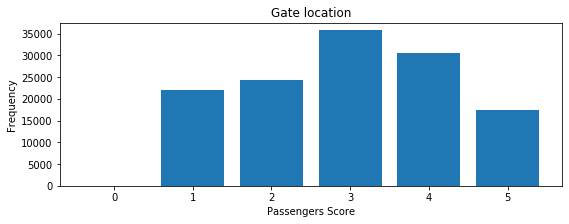

Gate location: 
 3    35717
4    30466
2    24296
1    21991
5    17409
0        1
Name: Gate location, dtype: int64


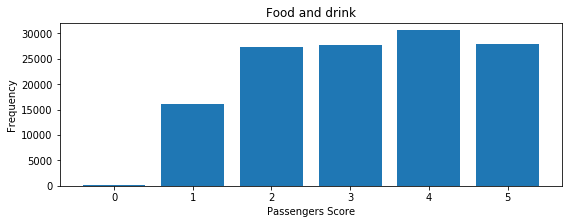

Food and drink: 
 4    30563
5    27957
3    27794
2    27383
1    16051
0      132
Name: Food and drink, dtype: int64


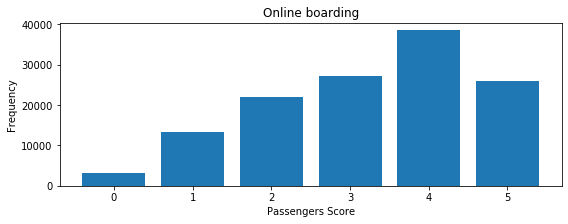

Online boarding: 
 4    38468
3    27117
5    26020
2    21934
1    13261
0     3080
Name: Online boarding, dtype: int64


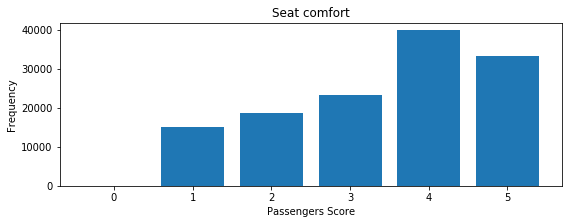

Seat comfort: 
 4    39756
5    33158
3    23328
2    18529
1    15108
0        1
Name: Seat comfort, dtype: int64


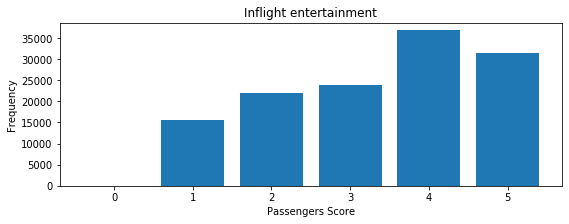

Inflight entertainment: 
 4    36791
5    31544
3    23884
2    21968
1    15675
0       18
Name: Inflight entertainment, dtype: int64


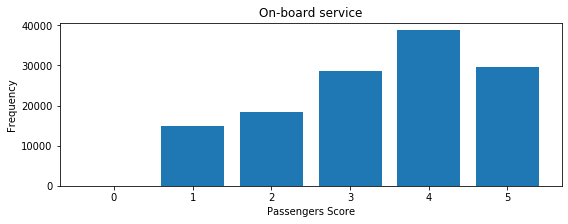

On-board service: 
 4    38703
5    29492
3    28542
2    18351
1    14787
0        5
Name: On-board service, dtype: int64


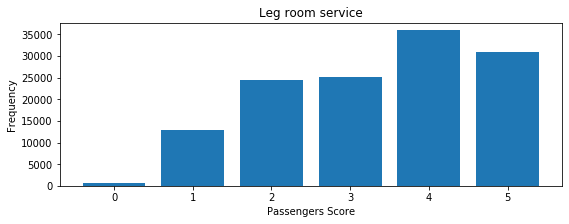

Leg room service: 
 4    35886
5    30905
3    25056
2    24540
1    12895
0      598
Name: Leg room service, dtype: int64


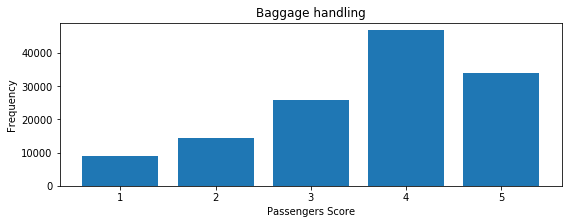

Baggage handling: 
 4    46761
5    33878
3    25851
2    14362
1     9028
Name: Baggage handling, dtype: int64


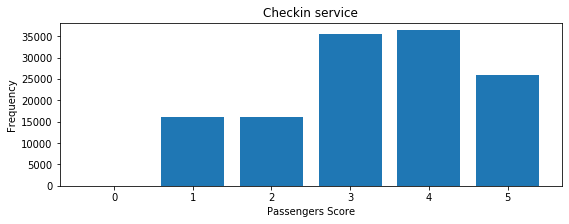

Checkin service: 
 4    36333
3    35453
5    25883
1    16108
2    16102
0        1
Name: Checkin service, dtype: int64


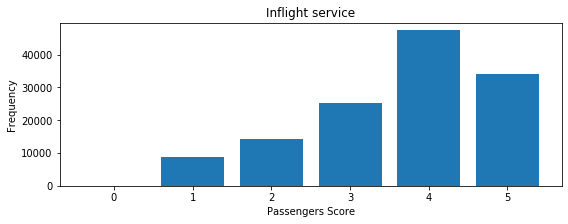

Inflight service: 
 4    47323
5    34066
3    25316
2    14308
1     8862
0        5
Name: Inflight service, dtype: int64


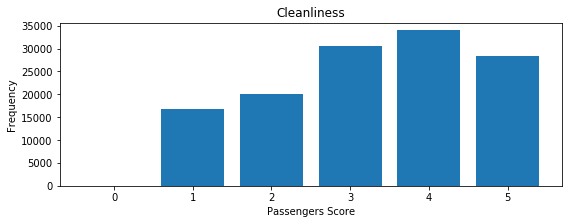

Cleanliness: 
 4    33969
3    30639
5    28416
2    20113
1    16729
0       14
Name: Cleanliness, dtype: int64


In [37]:
category1=["Inflight wifi service", "Departure/Arrival time convenient", "Ease of Online booking", "Gate location", "Food and drink", "Online boarding", "Seat comfort", "Inflight entertainment", "On-board service", "Leg room service", "Baggage handling", "Checkin service", "Inflight service", "Cleanliness",]
for c in category1:
    bar_plot(c)

## Numerical Variable

In [38]:
def plot_hist(variable):
    plt.figure(figsize=(9,3))
    plt.hist(final_df[variable],bins=50)
    plt.xlabel(variable)
    plt.ylabel("Fruequency")
    plt.title("{} distribution with histogram".format(variable))
    plt.show()

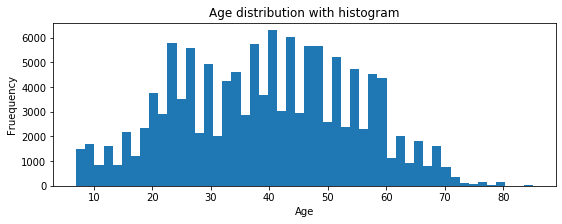

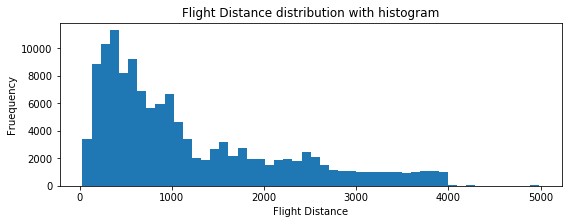

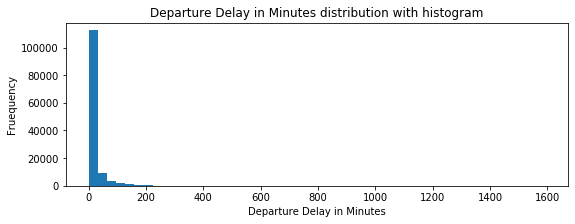

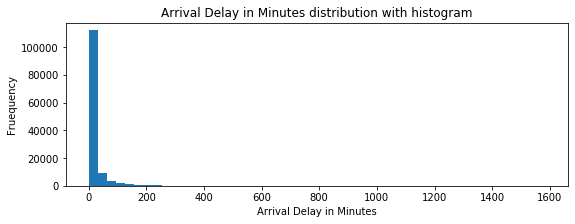

In [39]:
numericvar=["Age", "Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"]
for n in numericvar:
    plot_hist(n)

# Correlation plot

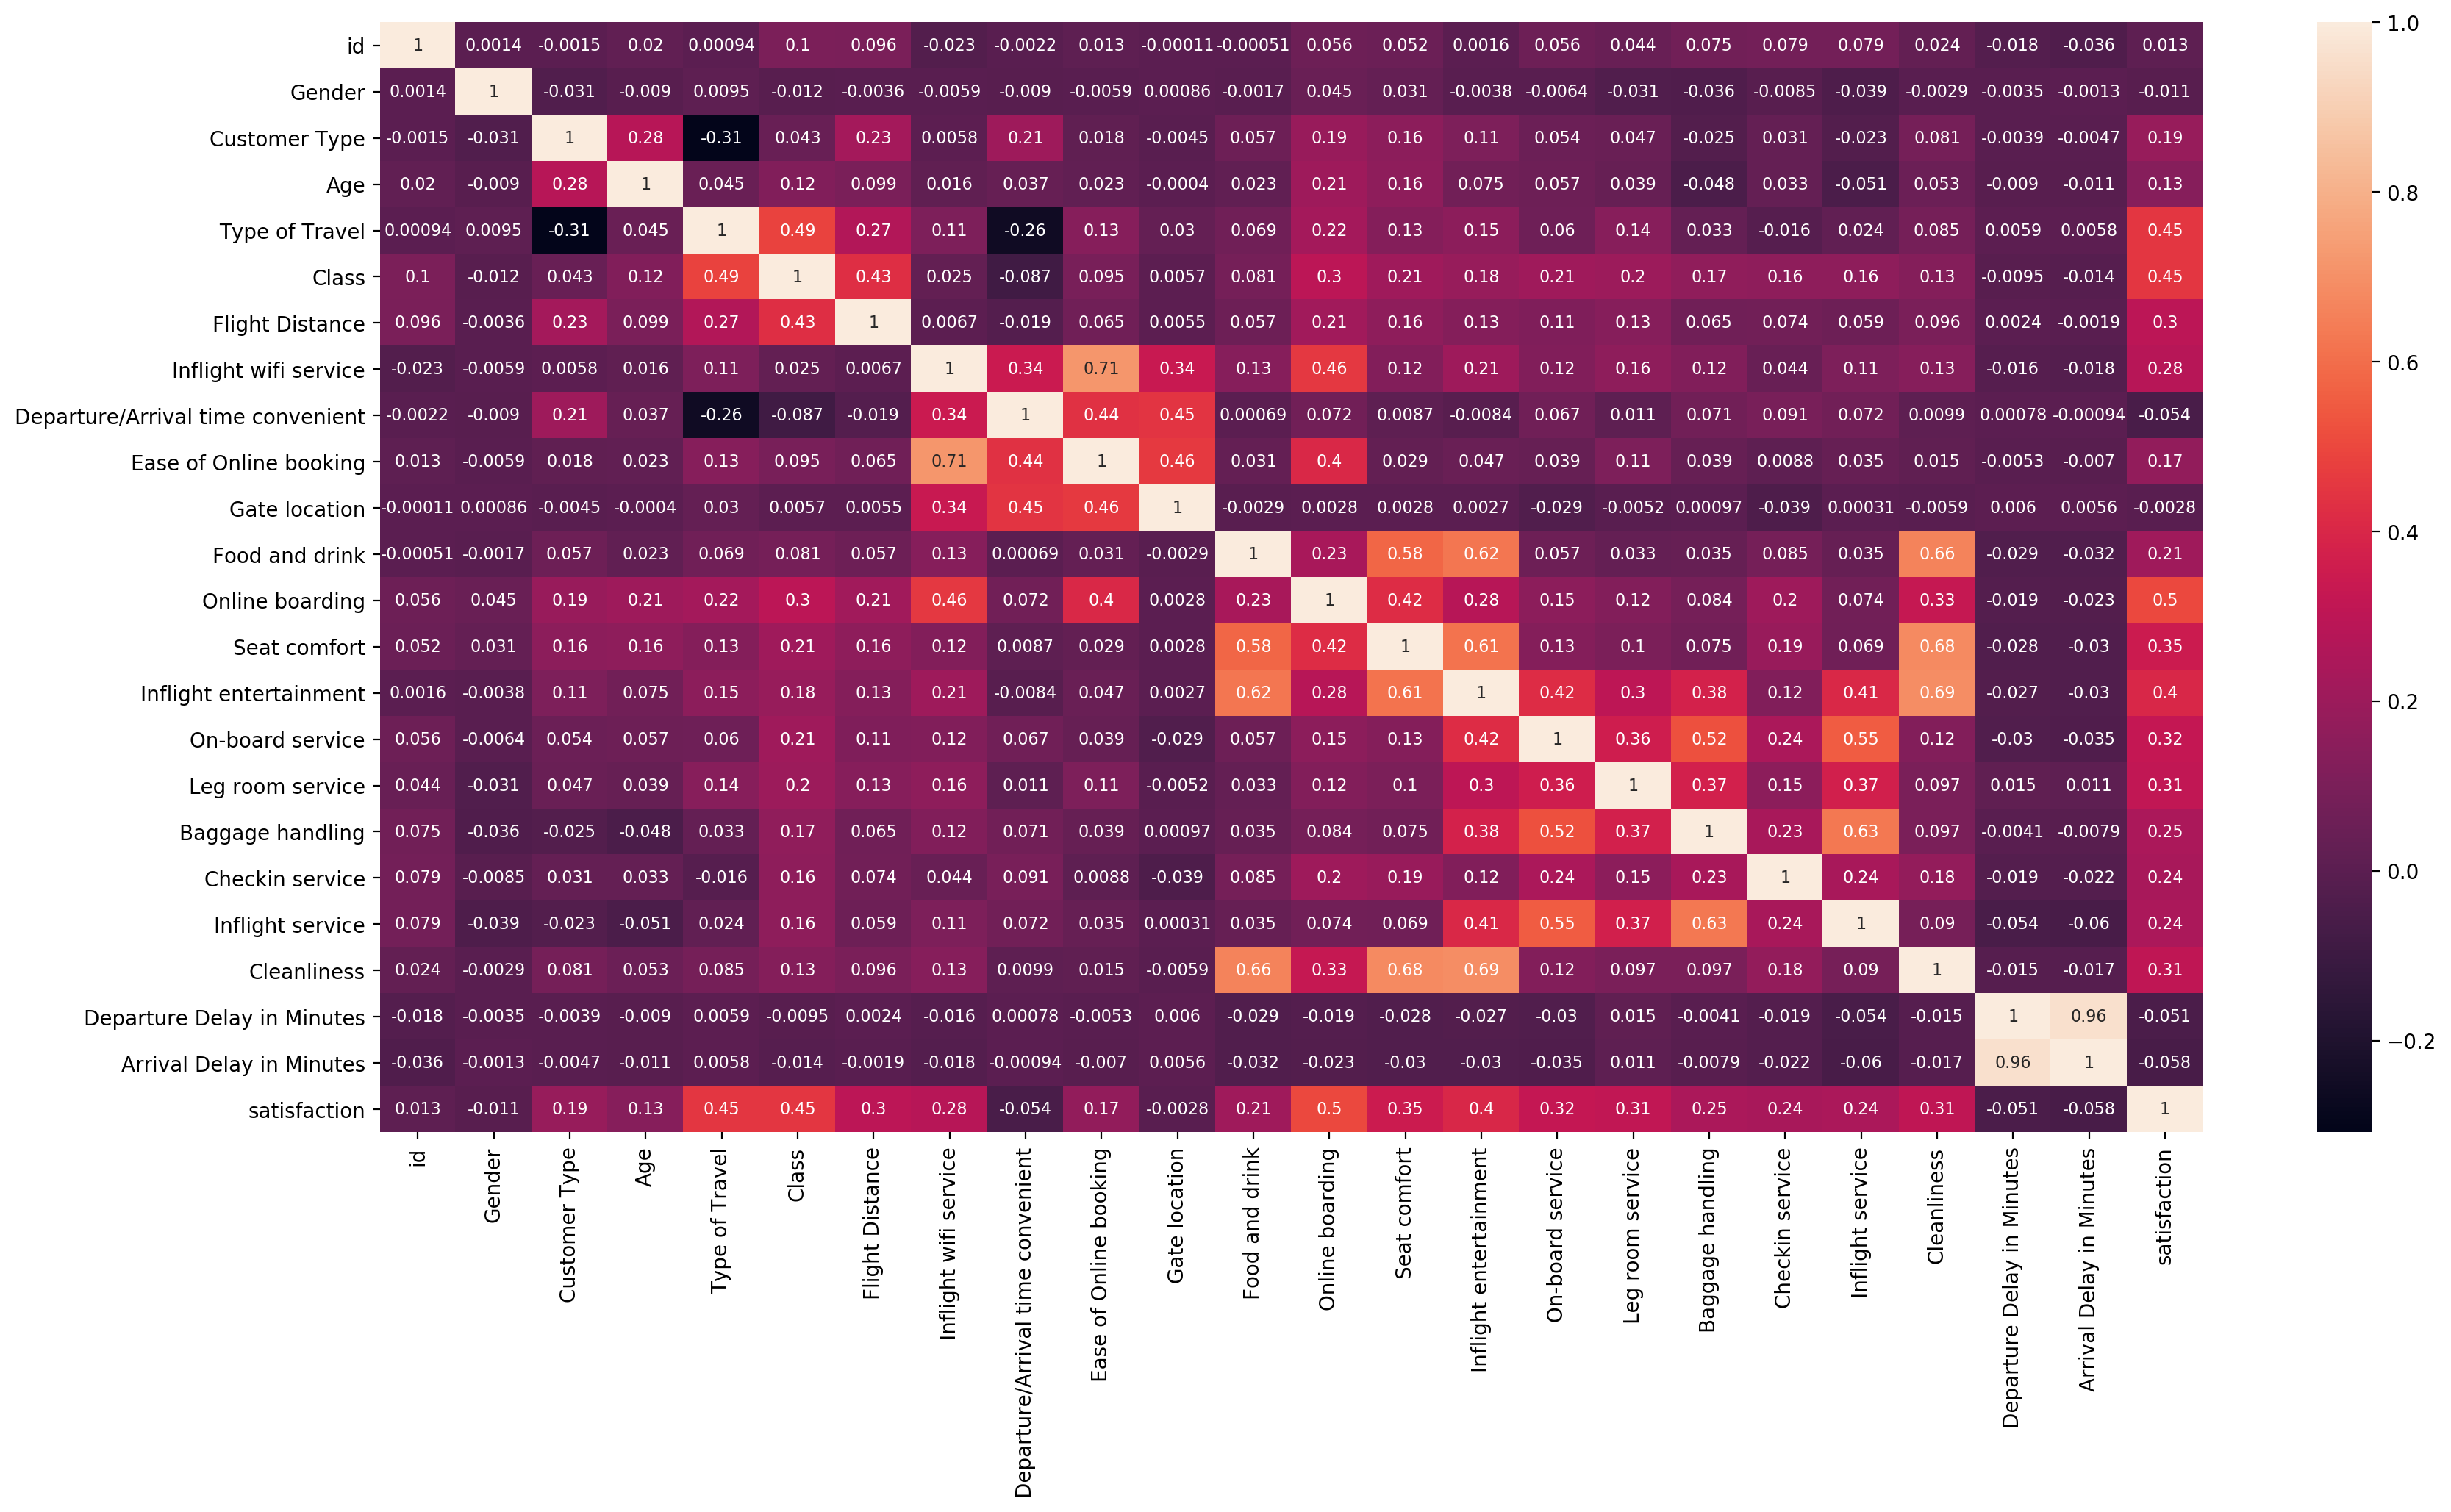

In [40]:
final_num = final_df.select_dtypes(include=['int64','float64' ])
correlation = final_num.corr()
plt.figure(figsize=(20,10),dpi=200)
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True, annot_kws={"size": 8})

# Outlier Detection
* Outlier detection is very important for the correct operation of the model when installing the model.

In [41]:
numerical_features = final_df.select_dtypes(exclude=['object']).drop(["satisfaction"],axis=1).copy()
numerical_features.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

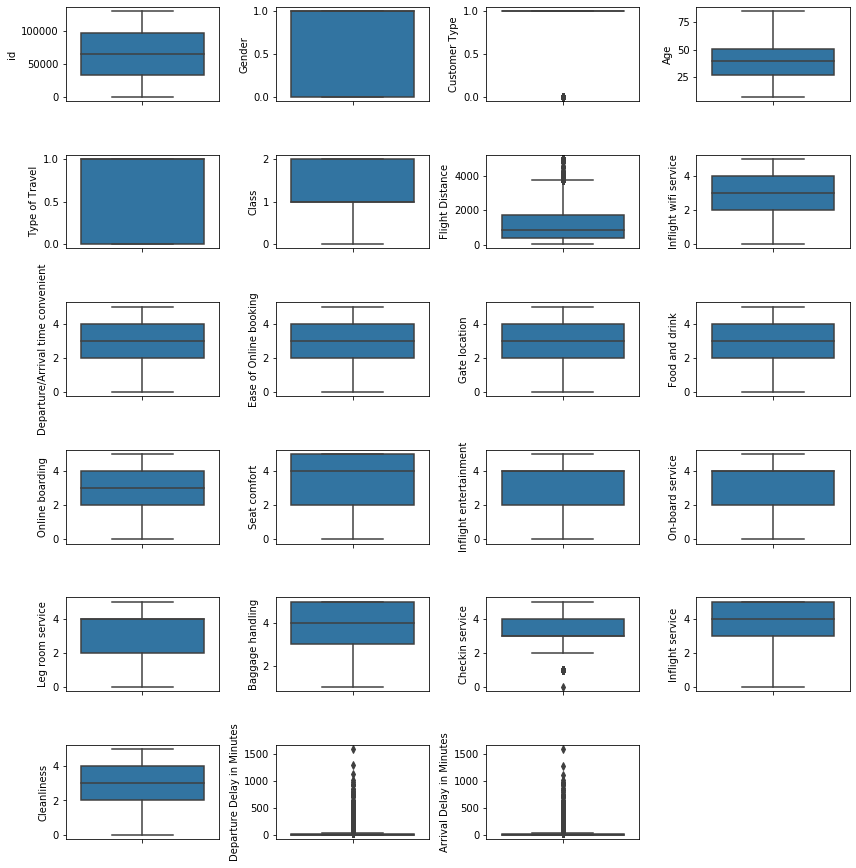

In [42]:
fig = plt.figure(figsize=(12,18))
for i in range(len(numerical_features.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=numerical_features.iloc[:,i])

plt.tight_layout()
plt.show()

* Below independent variables contain Outliers
* Customer Type
* Flight Distance
* Checkin service
* Arrival Delay in Minutes
* Departure Delay in Minutes

**Impute all outlers by use of Median()**

In [43]:
print(final_df['Customer Type'].quantile(0.50)) 
print(final_df['Customer Type'].quantile(0.95)) 
final_df['Customer Type'] = np.where(final_df['Customer Type'] > 1.0, 1.0, final_df['Customer Type'])

1.0
1.0


In [44]:
print(final_df['Flight Distance'].quantile(0.50)) 
print(final_df['Flight Distance'].quantile(0.95)) 
final_df['Flight Distance'] = np.where(final_df['Flight Distance'] > 844.0, 3380.0, final_df['Flight Distance'])


844.0
3380.0


In [45]:
print(final_df['Checkin service'].quantile(0.50)) 
print(final_df['Checkin service'].quantile(0.95)) 
final_df['Checkin service'] = np.where(final_df['Checkin service'] > 3.0, 5.0, final_df['Checkin service'])

3.0
5.0


In [46]:
print(final_df['Arrival Delay in Minutes'].quantile(0.50)) 
print(final_df['Arrival Delay in Minutes'].quantile(0.95)) 
final_df['Arrival Delay in Minutes'] = np.where(final_df['Arrival Delay in Minutes'] > 0.0, 78.0, final_df['Arrival Delay in Minutes'])

0.0
78.0


In [47]:
print(final_df['Departure Delay in Minutes'].quantile(0.50)) 
print(final_df['Departure Delay in Minutes'].quantile(0.95)) 
final_df['Departure Delay in Minutes'] = np.where(final_df['Departure Delay in Minutes'] > 0.0, 77.0, final_df['Departure Delay in Minutes'])


0.0
77.0


In [48]:
# Making a copy of cleaned data
final_df_ = final_df.copy()

## Drop ID

In [49]:
final_df.drop(labels=["id"],axis=1,inplace=True)

In [50]:
final_df.head()

Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  \
0       0            1.0   13               0      0            460.0   
1       0            0.0   25               1      2            235.0   
2       1            1.0   26               1      2           3380.0   
3       1            1.0   25               1      2            562.0   
4       0            1.0   61               1      2            214.0   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      3                                  4   
1                      3                                  2   
2                      2                                  2   
3                      2                                  5   
4                      3                                  3   

   Ease of Online booking  Gate location  ...  Inflight entertainment  \
0                       3              1  ...                       5   
1                       3              3  ...                       1   
2                       2              2  ...                       5   
3                       5              5  ...                       2   
4                       3              3  ...                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4              5.0   
1                 1                 5                 3              1.0   
2                 4                 3                 4              5.0   
3                 2                 5                 3              1.0   
4                 3                 4                 4              3.0   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                        77.0   
1                 4            1                        77.0   
2                 4            5                         0.0   
3                 4            2                        77.0   
4                 3            3                         0.0   

   Arrival Delay in Minutes  satisfaction  
0                      78.0             0  
1                      78.0             0  
2                       0.0             1  
3                      78.0             0  
4                       0.0             1  

[5 rows x 23 columns]

* Divide the target variable and independent variable into two sepearete object  <br>
* Named as X(contains all Independent Varibale) and y(has Target Variable) <br>

In [51]:
#CHOSE THE COLUMN FOR PRED. MODEL
X = final_df.loc[:,['Online boarding','Inflight wifi service','Type of Travel','Inflight entertainment','Customer Type'
                 ,'Gender','Cleanliness','Inflight service','Seat comfort',
                 'Class','Baggage handling','Age','Checkin service','Food and drink','Ease of Online booking']]

In [52]:
X.head()

Online boarding  Inflight wifi service  Type of Travel  \
0                3                      3               0   
1                3                      3               1   
2                5                      2               1   
3                2                      2               1   
4                5                      3               1   

   Inflight entertainment  Customer Type  Gender  Cleanliness  \
0                       5            1.0       0            5   
1                       1            0.0       0            1   
2                       5            1.0       1            5   
3                       2            1.0       1            2   
4                       3            1.0       0            3   

   Inflight service  Seat comfort  Class  Baggage handling  Age  \
0                 5             5      0                 4   13   
1                 4             1      2                 3   25   
2                 4             5      2                 4   26   
3                 4             2      2                 3   25   
4                 3             5      2                 4   61   

   Checkin service  Food and drink  Ease of Online booking  
0              5.0               5                       3  
1              1.0               1                       3  
2              5.0               5                       2  
3              1.0               2                       5  
4              3.0               4                       3

In [53]:
y = final_df.loc[:,'satisfaction'] 

In [54]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: satisfaction, dtype: int64

# Sampling
* Divide the data into model training dataset and test dataset. <br>


In [55]:
import sklearn
from sklearn.model_selection import train_test_split

In [56]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [57]:
print(x_train.shape)

print(y_train.shape)

(90916, 15)
(90916,)


In [58]:
print(sum(y_train==0))
print(sum(y_train==1))

51473
39443


# Feature Selection Technique


**Recursive Feature Elimination**




In [59]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [60]:
rfe = RFE(dtc,12)

In [61]:
rfe.fit(X,y)

RFE(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                     criterion='gini', max_depth=None,
                                     max_features=None, max_leaf_nodes=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     presort='deprecated', random_state=None,
                                     splitter='best'),
    n_features_to_select=12, step=1, verbose=0)

In [62]:

pd.DataFrame({'Column_Name':X.columns,'Significant_Level':rfe.support_}).sort_values(['Significant_Level'],ascending=False)

Column_Name  Significant_Level
0          Online boarding               True
1    Inflight wifi service               True
2           Type of Travel               True
3   Inflight entertainment               True
4            Customer Type               True
6              Cleanliness               True
7         Inflight service               True
8             Seat comfort               True
9                    Class               True
10        Baggage handling               True
11                     Age               True
12         Checkin service               True
5                   Gender              False
13          Food and drink              False
14  Ease of Online booking              False

# Model Building, testing and validation

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
LR = LogisticRegression()

In [65]:
LR.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
predictions_LR = LR.predict(x_test)
predictions_LR

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [67]:
tab_LR = confusion_matrix(predictions_LR,y_test)
print(tab_LR)


[[19631  2817]
 [ 2348 14168]]


In [68]:
accuracy_LR= tab_LR.diagonal().sum() / tab_LR.sum()*100

print("Accuracy for Logistic Model is :",accuracy_LR)

Accuracy for Logistic Model is : 86.74417410943434


In [69]:
TP_log = tab_LR[0, 0]
TN_log = tab_LR[1, 1]
FP_log = tab_LR[1,0]
FN_log = tab_LR[0, 1]

# Accuracy by calculation & built-in fuction
Overall_Accuracy_log = ((TP_log + TN_log) / float(TP_log + TN_log + FP_log + FN_log))
print('Overall Accuracy of Logistic Regression is:',Overall_Accuracy_log*100)

print('\n')
# Sensitivity or recall score or tpr
sensitivity_log = TP_log / float(FN_log + TP_log)
print('Sensitivity of Logistic Regression is:',sensitivity_log*100)

print('\n')
#Specificity
specificity_log = TN_log / (TN_log + FP_log)
print('Specificity of Logistic Regression is:',specificity_log*100)

print('\n')
#Precision
precision_log = TP_log / float(TP_log + FP_log)
print('precision value for Logistic Regression is:',precision_log*100)
print('\n')

#False_Positive_Rate
false_positive_rate_log = FP_log / float(TN_log + FP_log)
print('False Positive Ratio for Logistic Regression is:',false_positive_rate_log*100)


Overall Accuracy of Logistic Regression is: 86.74417410943434


Sensitivity of Logistic Regression is: 87.45099786172487


Specificity of Logistic Regression is: 85.78348268345847


precision value for Logistic Regression is: 89.31707539014513


False Positive Ratio for Logistic Regression is: 14.216517316541536


 # DecisionTreeClassifier

In [70]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
dte = DecisionTreeClassifier()

In [72]:
dte.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [73]:
predictions_dte = dte.predict(x_test)
predictions_dte

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [74]:
tab_dte = confusion_matrix(predictions_dte, y_test)
tab_dte

array([[20830,  1136],
       [ 1149, 15849]], dtype=int64)

In [75]:
print(classification_report(predictions_dte, y_test))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     21966
           1       0.93      0.93      0.93     16998

    accuracy                           0.94     38964
   macro avg       0.94      0.94      0.94     38964
weighted avg       0.94      0.94      0.94     38964



In [76]:
TP_dte = tab_dte[0, 0]
TN_dte = tab_dte[1, 1]
FP_dte = tab_dte[1,0]
FN_dte = tab_dte[0, 1]

# Accuracy by calculation & built-in fuction
accuracy_dte = ((TP_dte + TN_dte) / float(TP_dte + TN_dte + FP_dte + FN_dte))
print('Overall Accuracy of Decision Tree Classifier is :',accuracy_dte*100)

print('\n')
# Sensitivity or recall score or tpr
sensitivity_dte = TP_dte / float(FN_dte + TP_dte)
print('Sensitivity of Decision Tree Classifier is :',sensitivity_dte*100)

print('\n')
#Specificity
specificity_dte = TN_dte / (TN_dte + FP_dte)
print('Specificity of Decision Tree Classifier is :',specificity_dte*100)
print('\n')
#Precision
precision_dte = TP_dte / float(TP_dte + FP_dte)
print('precision value for Decision Tree Classifier is:',precision_dte*100)
print('\n')

#False_Positive_Rate
false_positive_rate_dte = FP_dte / float(TN_dte + FP_dte)
print('False Positive Ratio for Decision Tree Classifier:',false_positive_rate_dte*100)

Overall Accuracy of Decision Tree Classifier is : 94.1356123601273


Sensitivity of Decision Tree Classifier is : 94.8283711190021


Specificity of Decision Tree Classifier is : 93.24038122132016


precision value for Decision Tree Classifier is: 94.7722826334228


False Positive Ratio for Decision Tree Classifier: 6.759618778679845


**Feature Importance**

In [77]:
feature_importance = pd.DataFrame({'Significant_features':dte.feature_importances_,'Columns_name':x_train.columns}).sort_values(['Significant_features'],ascending = False)
feature_importance

Significant_features            Columns_name
0               0.366962         Online boarding
1               0.180492   Inflight wifi service
2               0.151745          Type of Travel
3               0.049228  Inflight entertainment
11              0.045330                     Age
4               0.038542           Customer Type
10              0.028866        Baggage handling
7               0.025660        Inflight service
12              0.025121         Checkin service
8               0.022978            Seat comfort
9               0.021475                   Class
14              0.015553  Ease of Online booking
6               0.014930             Cleanliness
13              0.007575          Food and drink
5               0.005541                  Gender

# Adaptive Boosting

In [78]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import AdaBoostClassifier

AdaBoost = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=600)

In [79]:
AdaBoost.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

In [80]:
predictions_abc = AdaBoost.predict(x_test)
predictions_abc

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [81]:
tab_abc = confusion_matrix(predictions_abc, y_test)
tab_abc

array([[21014,  1251],
       [  965, 15734]], dtype=int64)

In [82]:
accuracy_abp = tab_abc.diagonal().sum() / tab_abc.sum()*100
print('Accuracy for AdaBoost :',accuracy_abp)

Accuracy for AdaBoost : 94.31269890155015


In [96]:
TP_abc = tab_abc[0, 0]
TN_abc = tab_abc[1, 1]
FP_abc = tab_abc[1,0]
FN_abc = tab_abc[0, 1]

# Accuracy by calculation & built-in fuction
Overall_Accuracy_abc= ((TP_abc + TN_abc) / float(TP_abc + TN_abc + FP_abc + FN_abc))
print('Overall Accuracy of Adaptive Boosting is :',Overall_Accuracy_abc*100)
print('\n')
# Sensitivity or recall score or tpr
sensitivity_abc = TP_abc / float(FN_abc + TP_abc)
print('Sensitivity of Adaptive Boosting is :',sensitivity_abc*100)
print('\n')
#Specificity
specificity_abc = TN_abc / (TN_abc + FP_abc)
print('Specificity of Adaptive Boosting is :',specificity_abc*100)
print('\n')
#Precision
precision_abc = TP_abc / float(TP_abc + FP_abc)
print('precision value for Adaptive Boosting is:',precision_abc*100)
print('\n')

#False_Positive_Rate
false_positive_rate_abc = FP_abc / float(TN_abc + FP_abc)
print('False Positive Ratio Adaptive Boosting is:',false_positive_rate_abc*100)

Overall Accuracy of Adaptive Boosting is : 94.31269890155015


Sensitivity of Adaptive Boosting is : 94.38131596676398


Specificity of Adaptive Boosting is : 94.22121085094915


precision value for Adaptive Boosting is: 95.60944537968061


False Positive Ratio Adaptive Boosting is: 5.778789149050842


# Voting Classifier

In [84]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier

In [85]:
dtreee = DecisionTreeClassifier()
rfcc = RandomForestClassifier()
logstic = LogisticRegression()
Boost = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=100)

In [86]:
#voting = hard coz i want only predictions on Numeric
vc = VotingClassifier(estimators=[ ('dtreee',dtreee),('rfcc',rfcc),('logstic',logstic),('Boost',Boost)],voting='hard')

In [87]:
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('dtreee',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort='deprecated',
                                                     random_state=None,

In [88]:
Vooting_Classifier_Accuracy = accuracy_score(vc.predict(x_test),y_test)
Vooting_Classifier_Accuracy

0.954111487526948

* Our model estimates 95.26% correctly. Our model works well.

<a id = "34"></a><br>
## Prediction and Submission

In [89]:
test_satisfaction = pd.Series(vc.predict(X), name = "satisfaction").astype(int)
results = pd.concat([final_df_.id, test_satisfaction],axis = 1)
results.to_csv("satisfaction.csv", index = False)
results.head()

id  satisfaction
0   70172             0
1    5047             0
2  110028             1
3   24026             0
4  119299             1

In [90]:
results

id  satisfaction
0        70172             0
1         5047             0
2       110028             1
3        24026             0
4       119299             1
...        ...           ...
129875   78463             0
129876   71167             1
129877   37675             0
129878   90086             1
129879   34799             0

[129880 rows x 2 columns]

**Comparison Between Models**

In [91]:
accuracies = ({"Logistic Regression":Overall_Accuracy_log*100,
               "Decision Tree Classifier":accuracy_dte*100,
               "Adaptive Boosting":Overall_Accuracy_abc*100})

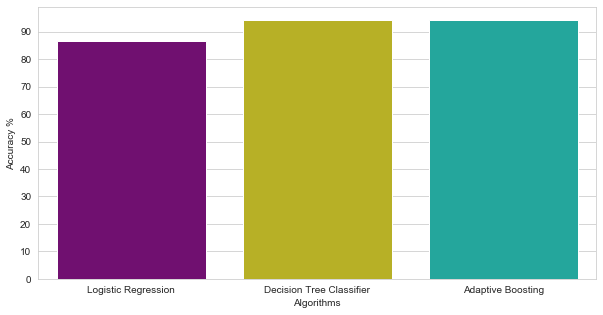

In [92]:
colors = ["purple", "#CFC60E","#0FBBAE"]
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

# AUROC CURVE

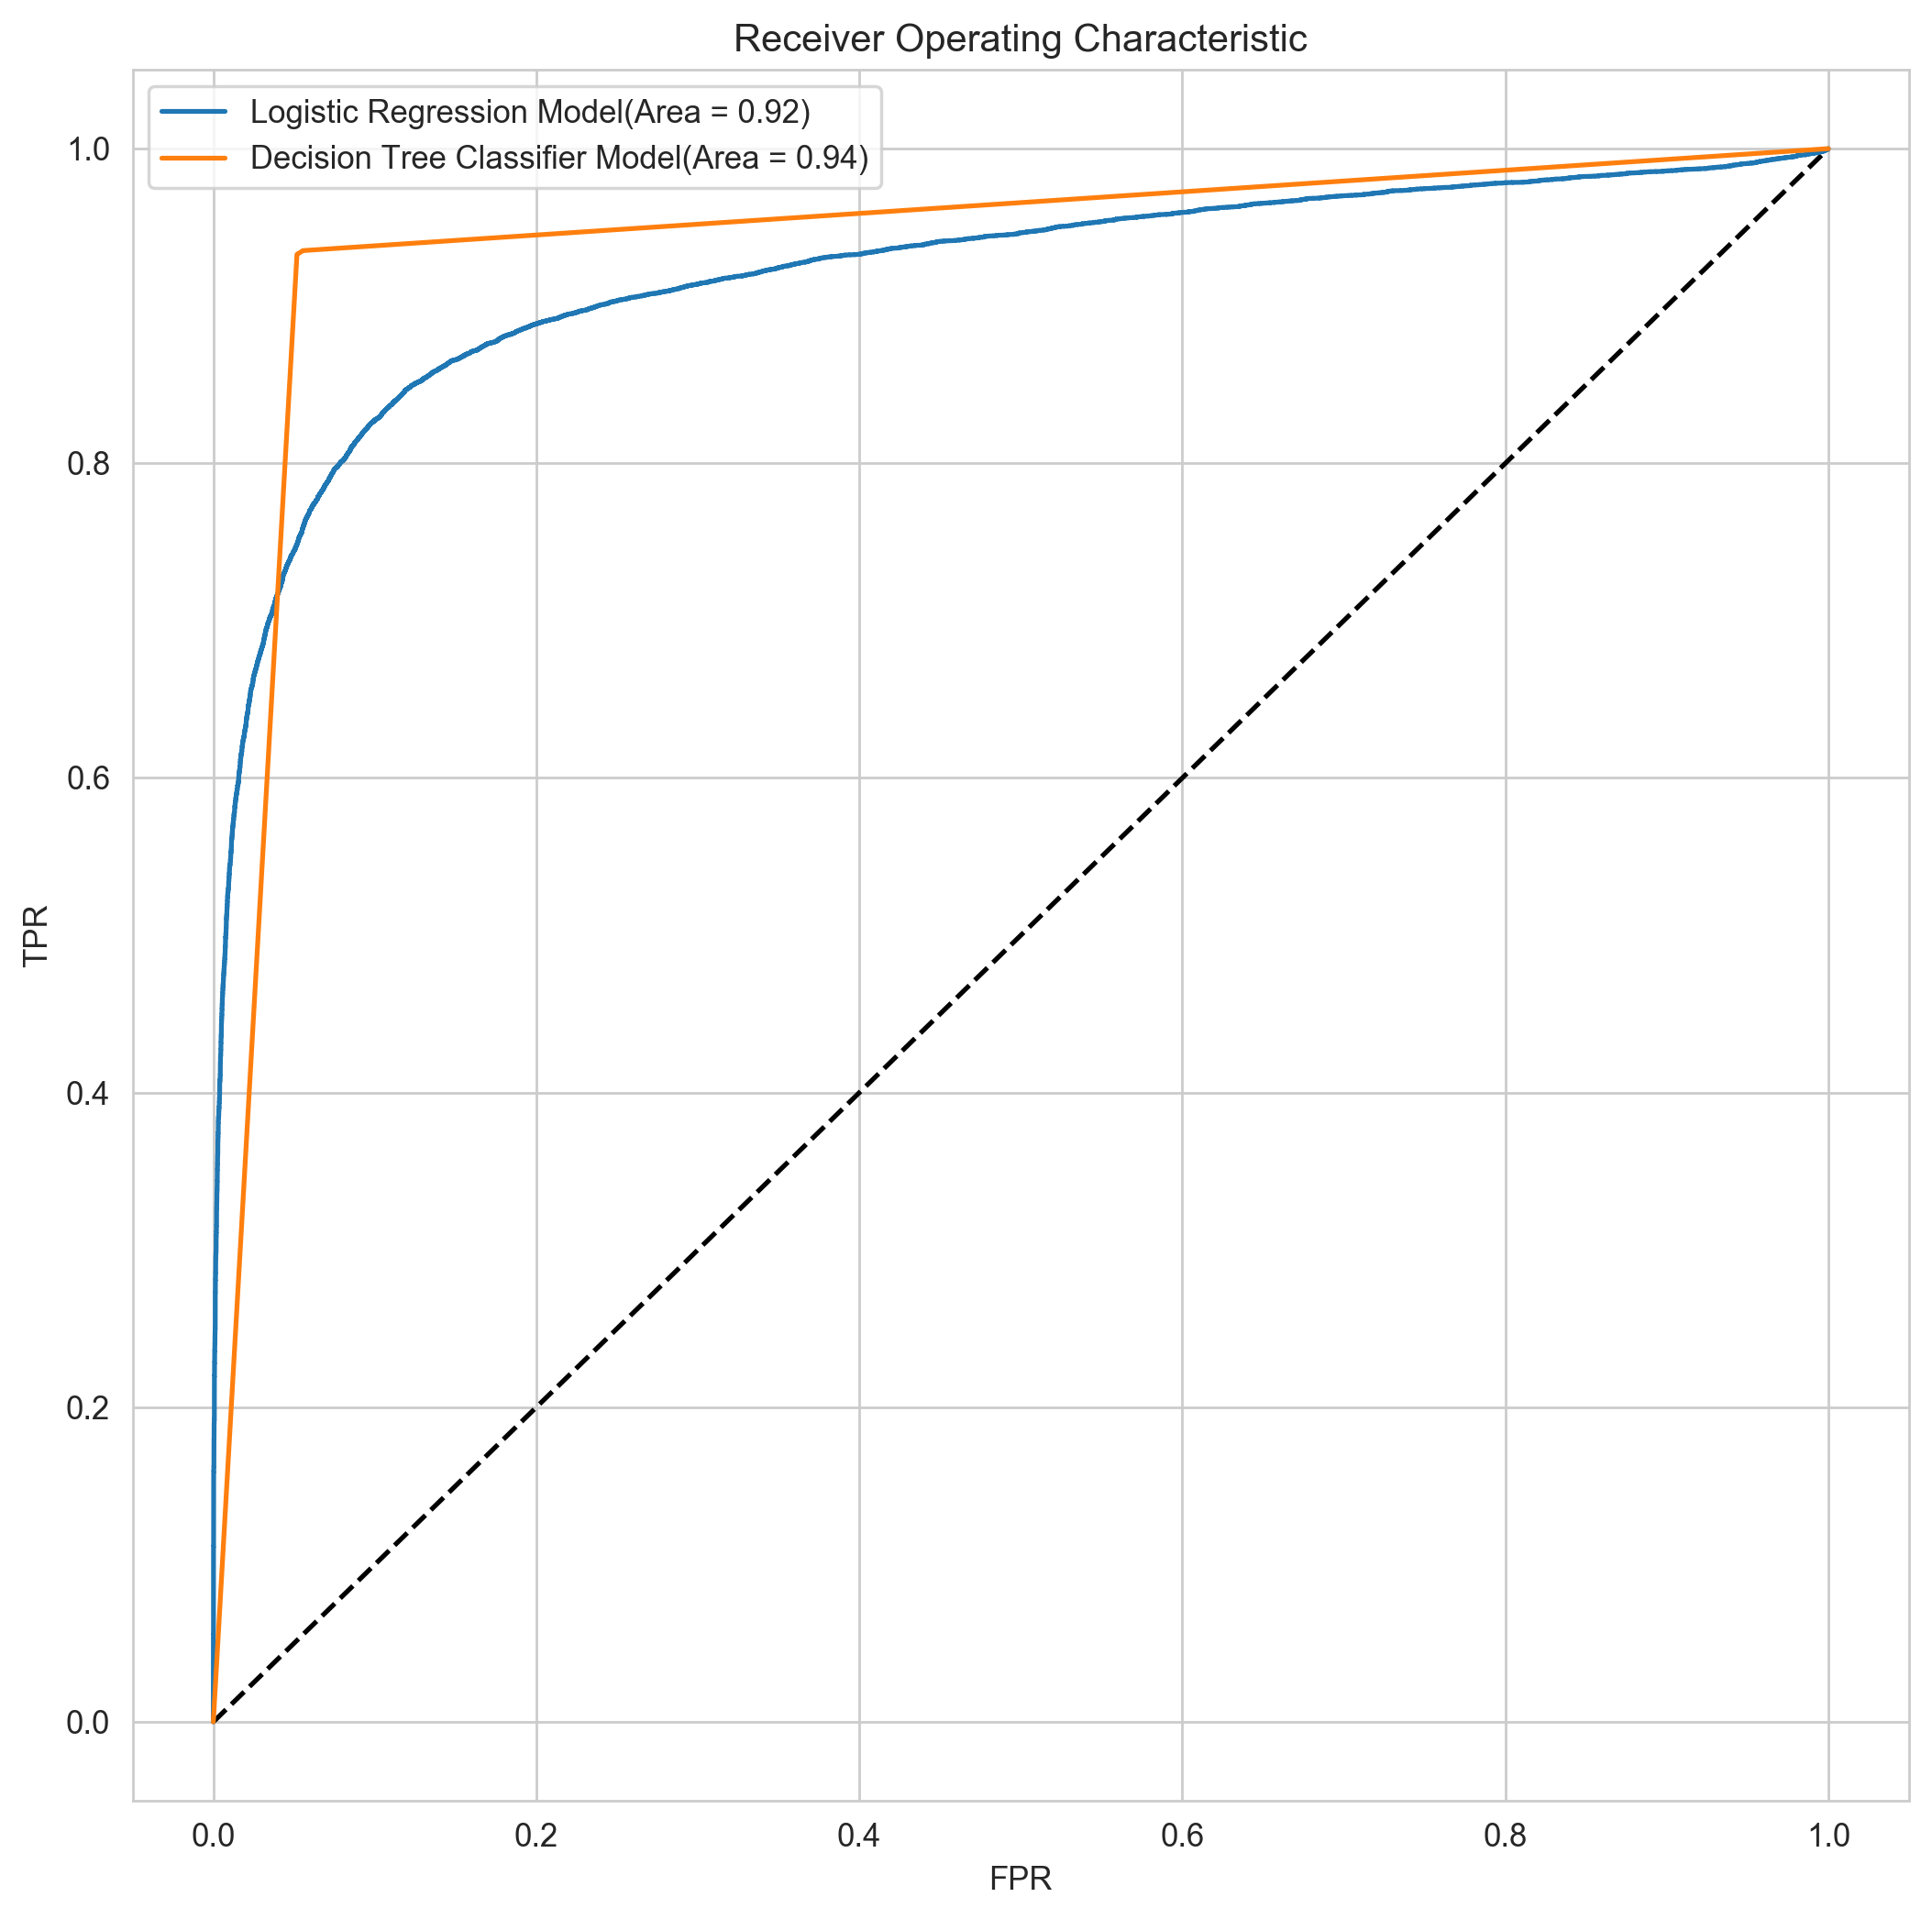

In [94]:
#ROC Curve
from sklearn.metrics import roc_curve
y_pred_prob1 = LR.predict_proba(x_test)[:,1]
log_roc_auc_lr = roc_auc_score(y_test,y_pred_prob1)
fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)

y_pred_prob2 = dte.predict_proba(x_test)[:,1]
log_roc_auc_dte = roc_auc_score(y_test,y_pred_prob2)
fpr2 , tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)

plt.figure(figsize=(10,10),dpi=250)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label = 'Logistic Regression Model(Area = %.2f)' % log_roc_auc_lr)
plt.plot(fpr2, tpr2, label = 'Decision Tree Classifier Model(Area = %.2f)' % log_roc_auc_dte)
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.title('Receiver Operating Characteristic')
plt.show()

# Confusion Matrixes

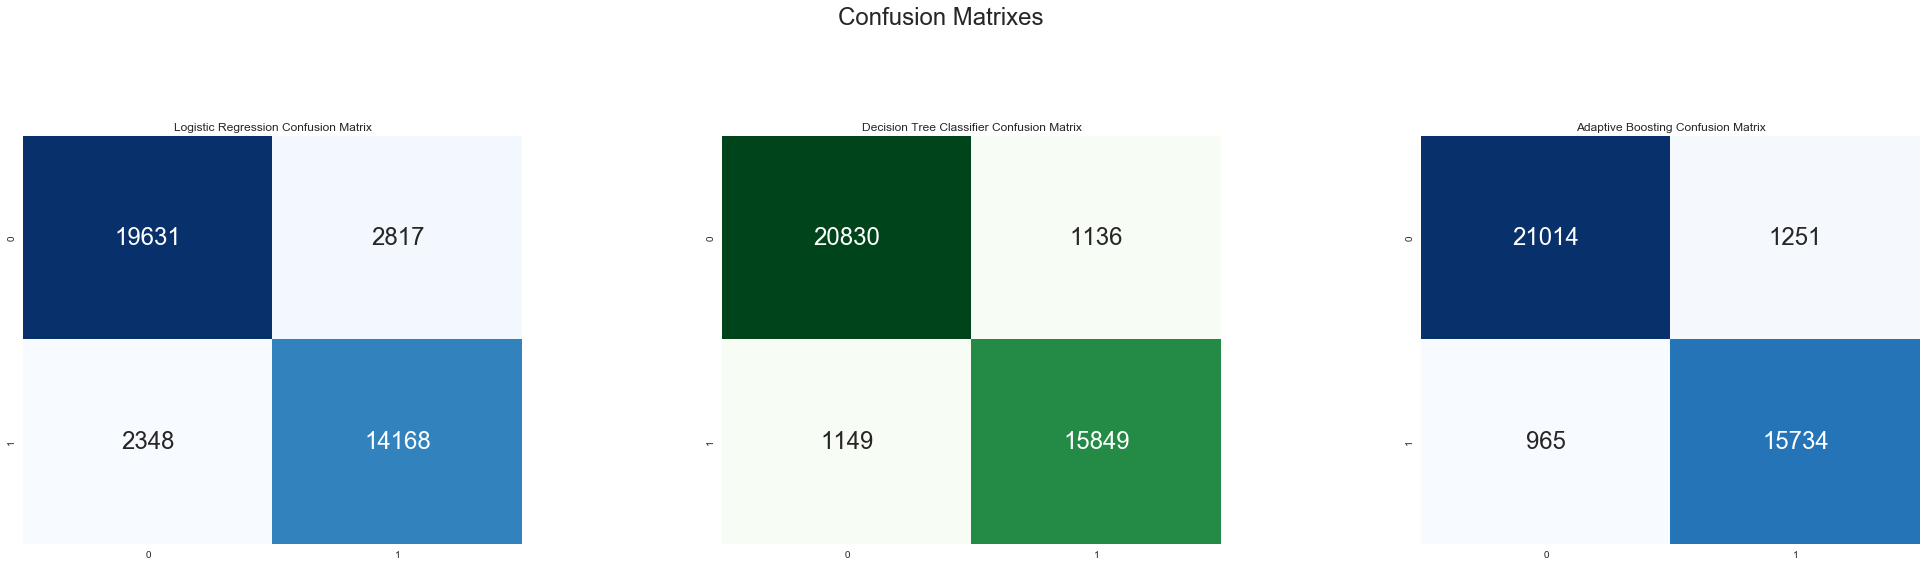

In [95]:
plt.figure(figsize=(34,18))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(tab_LR,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(tab_dte,annot=True,cmap="Greens",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Adaptive Boosting Confusion Matrix")
sns.heatmap(tab_abc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
plt.show()